In [1]:
import math
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
tmol=1e-6
R = 0.005*2
D = 10.
kD = 4*math.pi*R*D
ka = 1*kD
Pa = ka/6./math.sqrt(2)/D/0.005
print Pa
totalrep = 1./(1+kD/ka)
print totalrep
tau = tmol/((R)**2 /D/(1+ka/kD)**2)
#prebt = (1+math.exp(tau)*(scipy.special.erf(math.sqrt(tau))-1))/(1+kD/ka)
prebt = 0.263#0.982
lamda = -np.log(1-prebt)/tmol
print prebt,1./lamda

2.96192195877
0.5
0.263 3.27689013728e-06


In [44]:
dat = np.random.exponential(1/lamda,int(1e5))
hist, bin_edges = np.histogram(dat,bins=np.logspace(-7,0,50))
tt = 0.5*(bin_edges[:-1]+bin_edges[1:])
binwid = -(bin_edges[:-1]-bin_edges[1:])
ft = np.array([float(h)/int(1e5)/b for h,b in zip(hist,binwid)])
print sum(ft*binwid)

0.96977


In [35]:
M=[]
trial = int(1e4)
maxt = 1e3*tmol
def rant():
    return np.random.exponential(1/lamda)
for i in range(trial):
    t=0.
    x=1
    while t<maxt:
        dt = rant()
        if (x==1) and (dt<tmol):
            t+=dt
            M.append(t)
            break
        else:
            t+= tmol
            ran = np.random.randint(2)#np.random.uniform(0,1,2)
            if ran==1:
                d=1
            else: d= -1
            x+=d
            if (x)==0:   
                x = 1
                M.append(t)
                break
            #else: x+=d
#uq,uqcnt = np.unique(M,return_counts=True)
#for i,j in zip(uq,uqcnt):
#    print i,float(j)/trial
print min(M),max(M)
M = np.array(M)
print float(len(M))/trial
print float(len(M[M<tmol]))/trial
#print float(len(M[M>=tmol]))/trial

8.22002384703e-13 0.00099856116678
0.9858
0.2625


0.9998


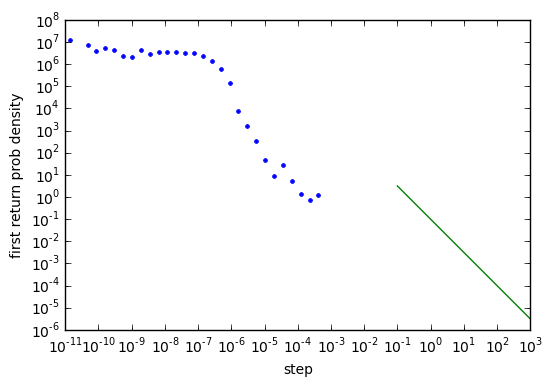

In [10]:
hist, bin_edges = np.histogram(M,bins=np.logspace(np.log10(min(M)),np.log10(max(M)),30))
tt = 0.5*(bin_edges[:-1]+bin_edges[1:])
binwid = -(bin_edges[:-1]-bin_edges[1:])
ft = np.array([float(h)/trial/b for h,b in zip(hist,binwid)])
plt.loglog(tt,ft,'.')
z = lambda x: 0.1*(x**-1.5) #t^(-0.5)
#w = lambda x: 0.1*(x**-0.5) #t^(-0.5)
plt.plot(np.logspace(-1,3,50),z(np.logspace(-1,3,50)),label='p ~ t^-1.5')
#plt.plot(np.logspace(-6,1,50),w(np.logspace(-6,1,50)),'r',label='p ~ t^-0.5')
plt.xlabel('step')
plt.ylabel('first return prob density')
totalsum = sum(ft*binwid)
print totalsum

In [5]:
for i in range(10):
    print np.random.randint(2)

1
0
0
1
1
1
1
1
0
0


In [71]:
a = np.array([[1,0,0],[0,1,0],[0,0,1],[-1,0,0],[0,-1,0],[0,0,-1]])

In [92]:
sum(np.array([0,0,0]))

0

In [41]:
da=1/(0.5-0.263) -1
print 4*3.14/3/2**0.5/da

0.919553908997


In [37]:
1./0.237 -1

3.219409282700422

In [39]:
1./3.219 *4*3.14 /3/2**0.5

0.9196708265199377

In [42]:
0.5-0.263

0.237